In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')





In [10]:
from google.colab import files
upload=files.upload ()

Saving bank-full.csv to bank-full.csv


In [12]:
data=pd.read_csv('bank-full.csv',delimiter=';')

In [13]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [14]:
print(data.shape)

(45211, 17)


In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [20]:
data[data.duplicated()].shape

(0, 17)

In [21]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
data[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [22]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 0


In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [24]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

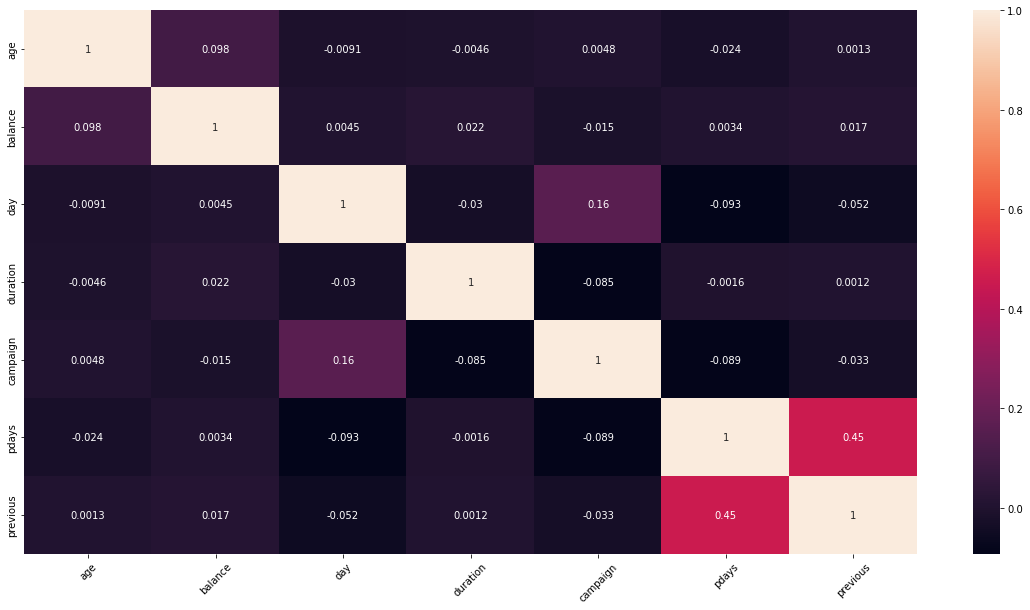

In [25]:
fig= plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

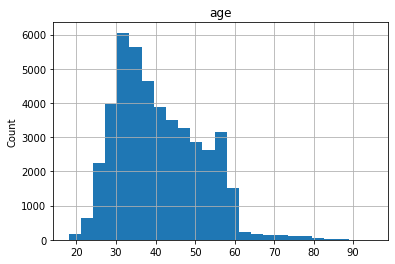

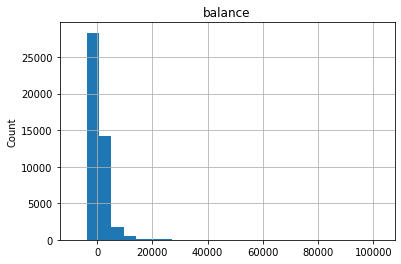

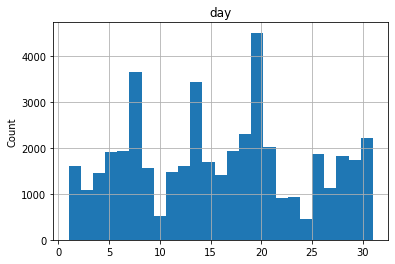

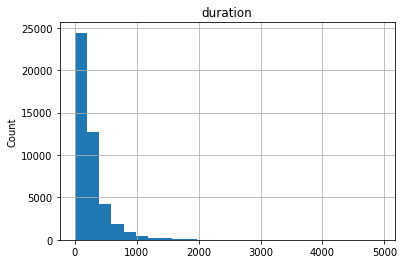

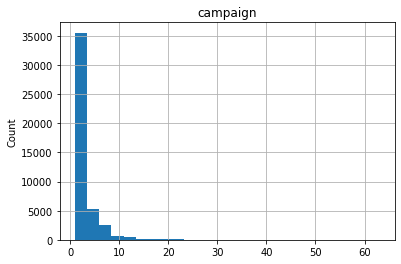

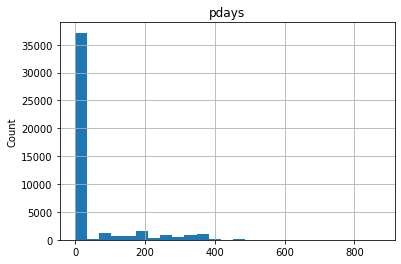

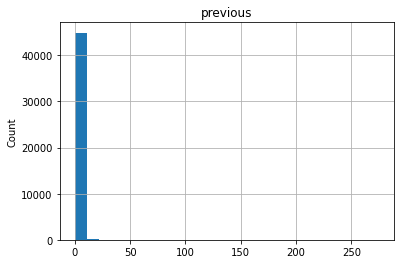

In [26]:
for feature in continuous_feature:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

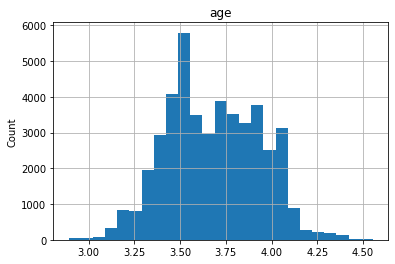

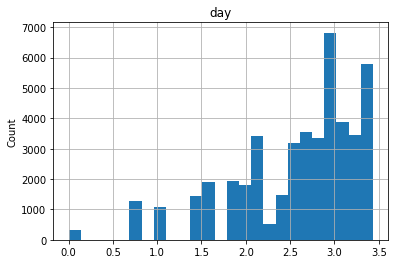

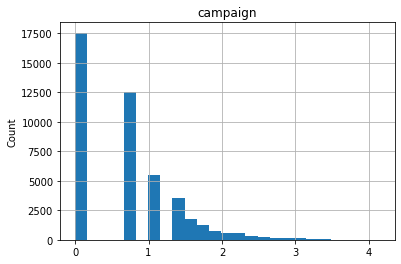

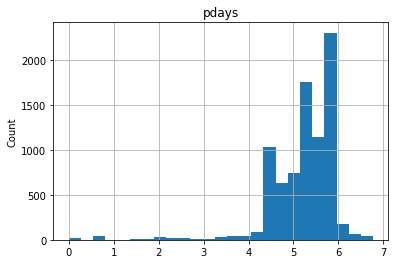

In [27]:
for feature in continuous_feature:
    data=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()


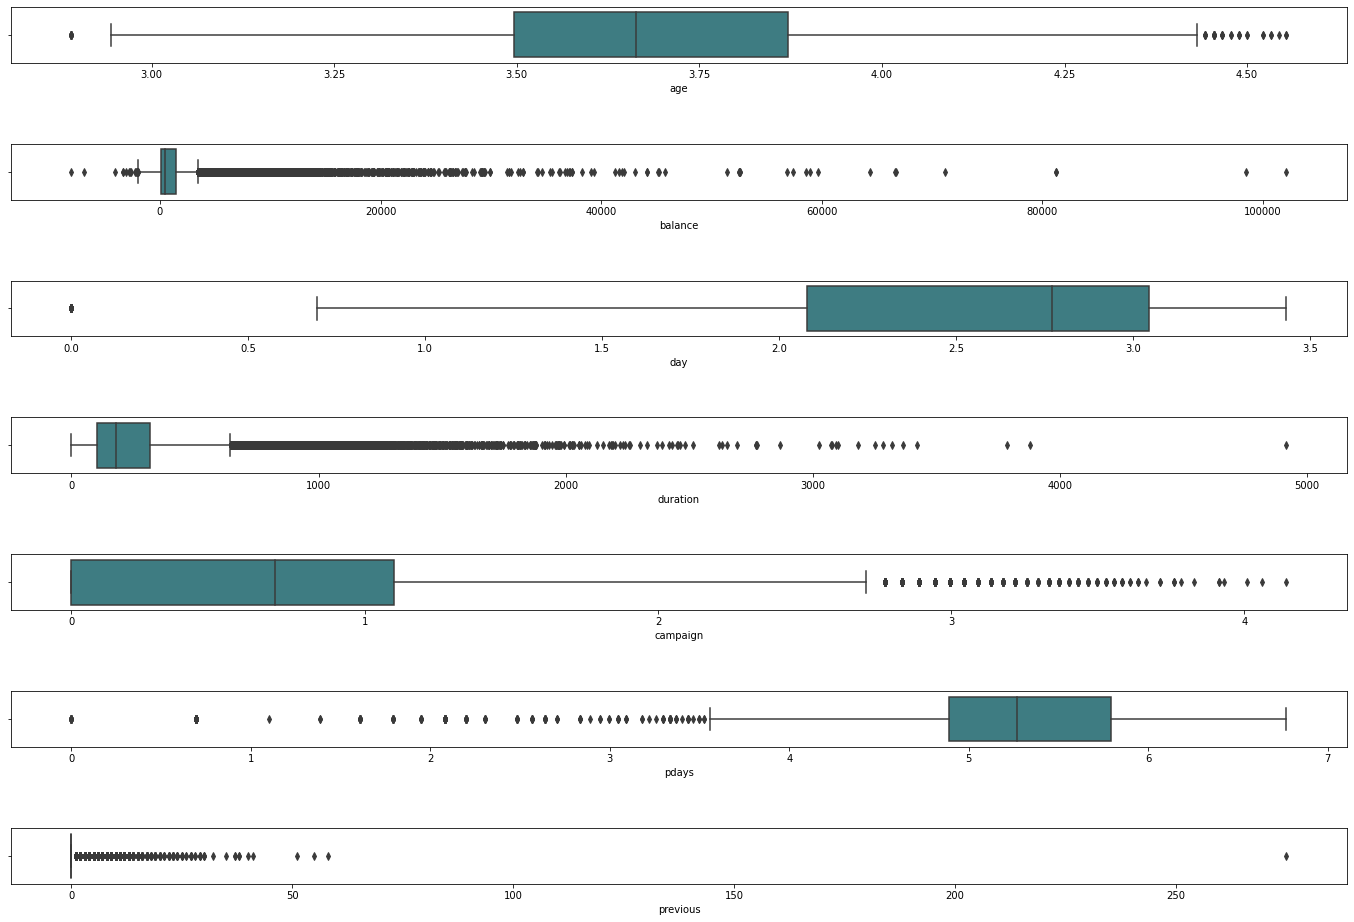

In [28]:
ot=data.copy() 
fig, axes=plt.subplots(7,1,figsize=(20,14),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=5.0)

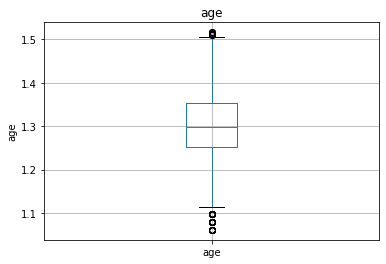

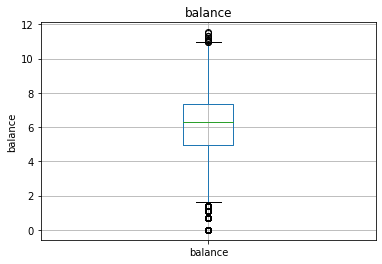

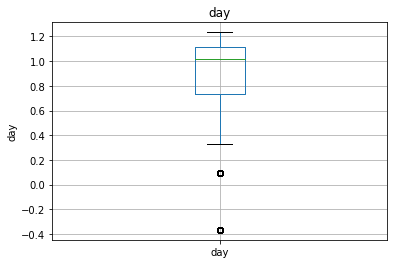

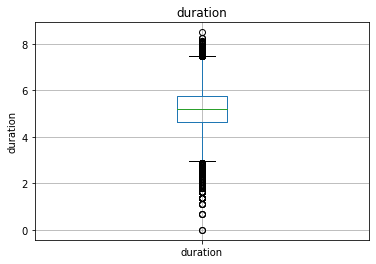

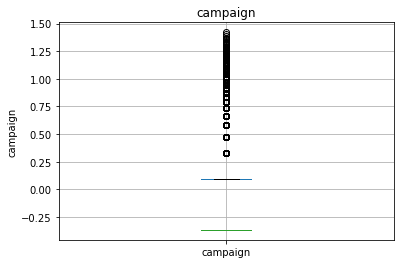

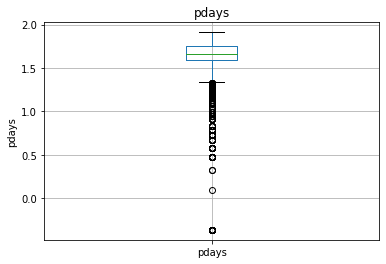

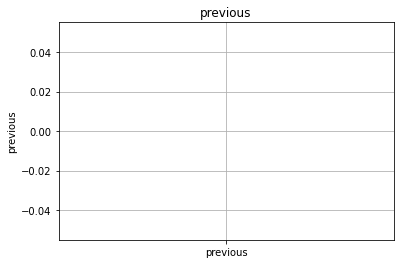

In [29]:
for feature in continuous_feature:
    data=data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

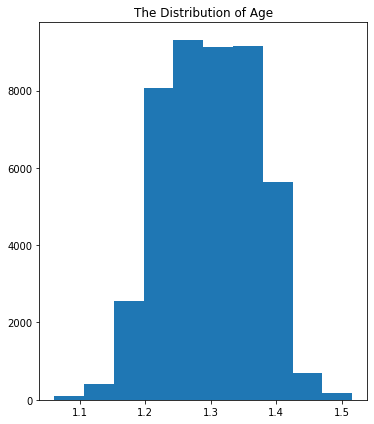

In [30]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 


ra1.hist(data['age'])
ra1.set_title('The Distribution of Age')

plt.tight_layout() 
plt.show()


In [31]:
data[['age','balance']].describe()

,age,balance
count,45211.000000,4.144500e+04
mean,1.300362,-inf
std,0.069286,NaN
min,1.061385,-inf
25%,1.251765,4.983607e+00
50%,1.298436,6.295266e+00
75%,1.353565,7.375256e+00
max,1.515979,1.153397e+01


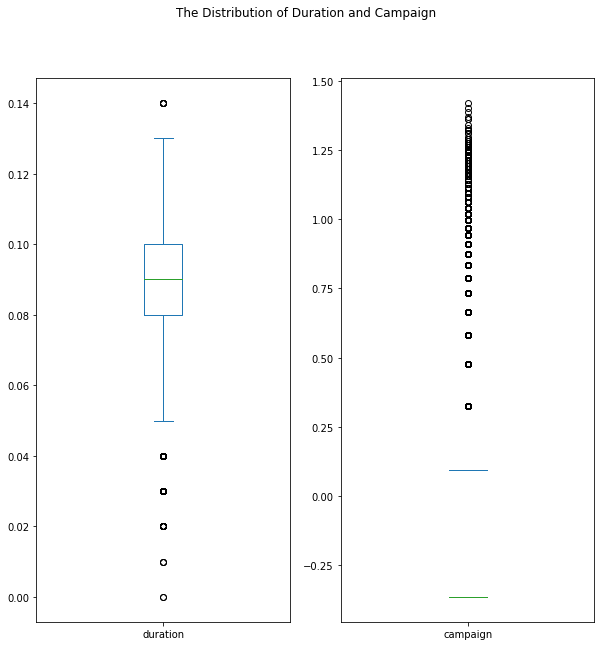

In [32]:
data1 = data.copy()
data1['duration'] = data1['duration'].apply(lambda n:n/60).round(2)
data1[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (10,10),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()


In [33]:
data1[['duration','campaign']].describe()

,duration,campaign
count,45211.00,4.521100e+04
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,0.08,NaN
50%,0.09,-3.665129e-01
75%,0.10,9.404783e-02
max,0.14,1.421453e+00


In [34]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (data[data['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (data[data['y'] == 'no'][['y','balance']].describe())['balance']

b_df


,balance_yes,balance_no
count,5079.000000,3.636600e+04
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,5.545177,4.905275e+00
50%,6.697034,6.242223e+00
75%,7.725771,7.317212e+00
max,11.304720,1.153397e+01


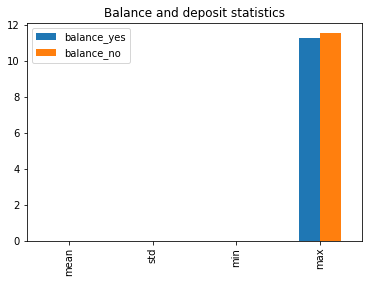

In [35]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [36]:
a_df = pd.DataFrame()
a_df['age_yes'] = (data[data['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (data[data['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,1.299519,1.300474
std,0.084176,0.067067
min,1.061385,1.061385
25%,1.233722,1.251765
50%,1.291320,1.298436
75%,1.364055,1.353565
max,1.515979,1.515979


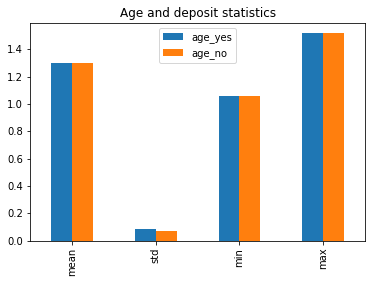

In [37]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [38]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (data[data['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (data[data['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df


,campaign_yes,campaign_no
count,5289.000000,3.992200e+04
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,NaN,NaN
50%,-0.366513,-3.665129e-01
75%,0.094048,9.404783e-02
max,1.242925,1.421453e+00


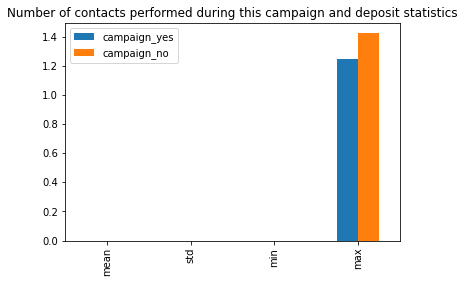

In [39]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [40]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (data[data['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (data[data['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,3.992200e+04
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,NaN,NaN
50%,NaN,NaN
75%,0.000000,NaN
max,4.060443,5.616771e+00


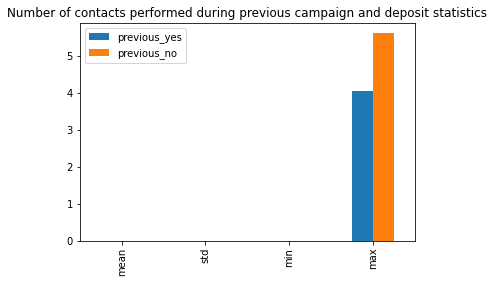

In [41]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

In [42]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
data[categorical_features].head(15)

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,yes,yes,unknown,may,unknown,no
7,entrepreneur,divorced,tertiary,yes,yes,no,unknown,may,unknown,no
8,retired,married,primary,no,yes,no,unknown,may,unknown,no
9,technician,single,secondary,no,yes,no,unknown,may,unknown,no


In [43]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(data[feature].unique()),feature))

12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


In [44]:
for feature in data.columns:
    if data[feature].dtypes == 'object':
        unique_cat = len(data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(data[feature].value_counts())
        print()

Feature 'job' has 12 unique categories
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Feature 'marital' has 3 unique categories
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Feature 'education' has 4 unique categories
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Feature 'default' has 2 unique categories
no     44396
yes      815
Name: default, dtype: int64

Feature 'housing' has 2 unique categories
yes    25130
no     20081
Name: housing, dtype: int64

Feature 'loan' has 2 unique categories
no     37967
yes     7244
Name: loan, dtype: int64

Feature 'contact' has 3 unique categories
cellular     29285
unknown      13020
telephone     2906
Name: contac

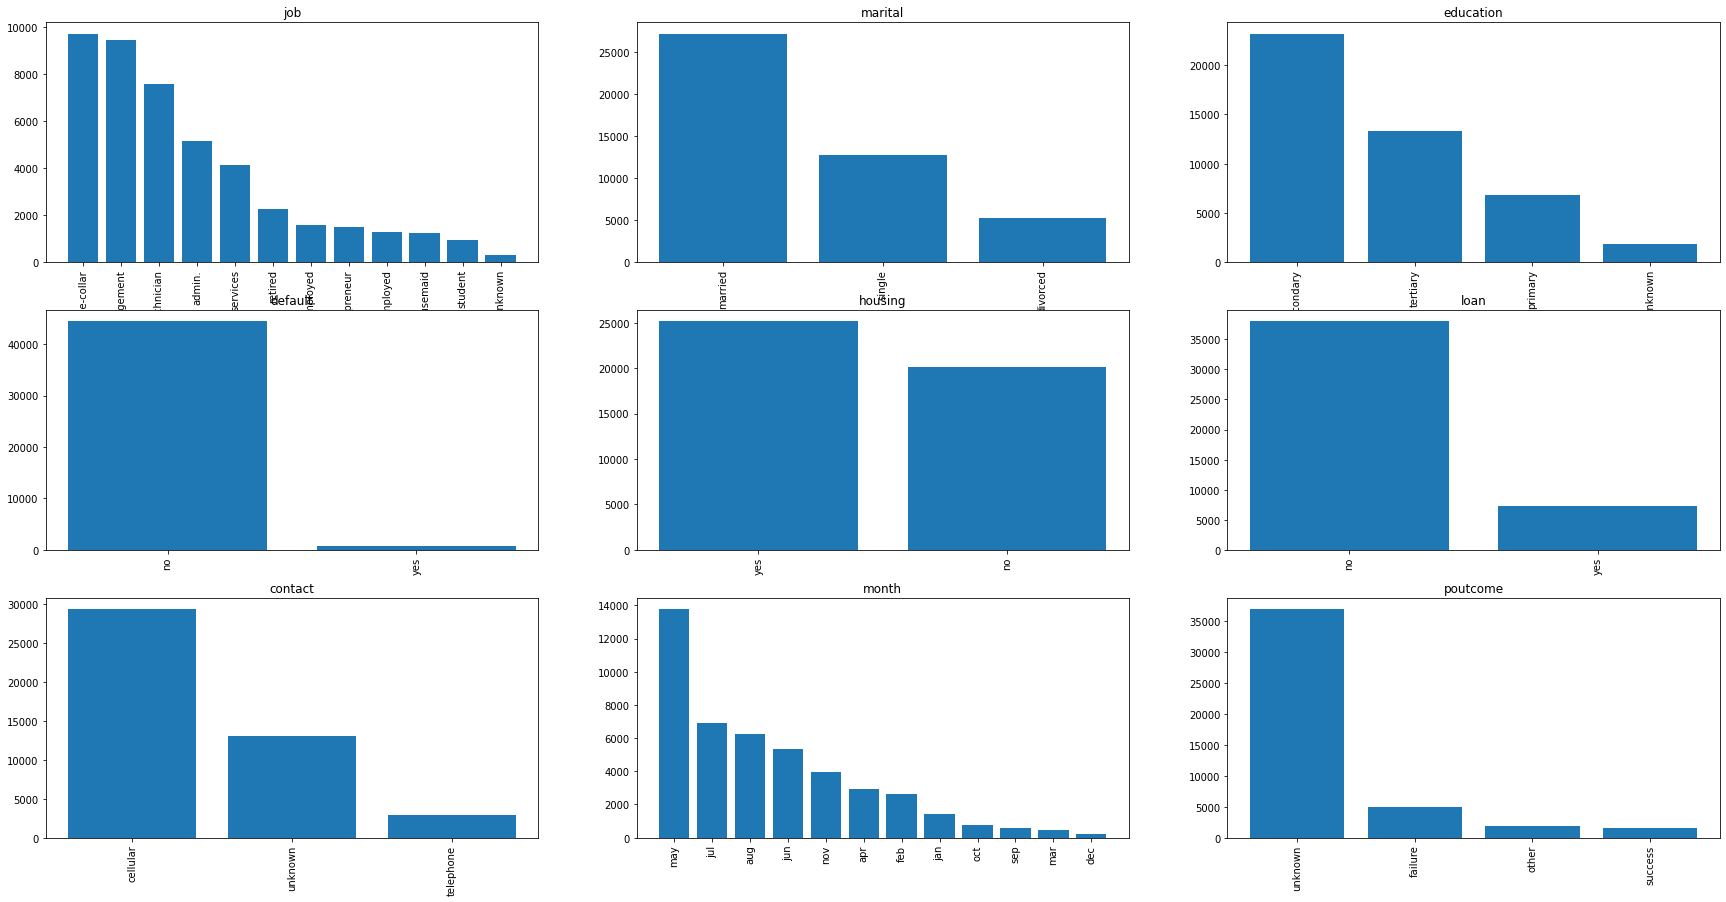

In [45]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(30, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Text(0.5, 1.0, 'Jobs')

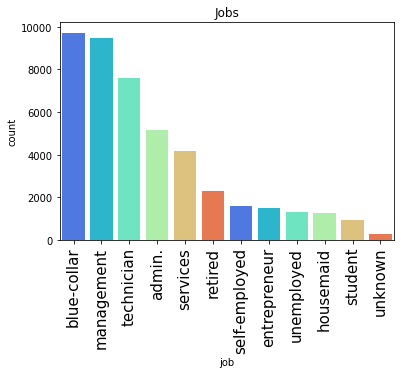

In [46]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=data, palette = pal, 
              order=data['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize =15)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital Status')

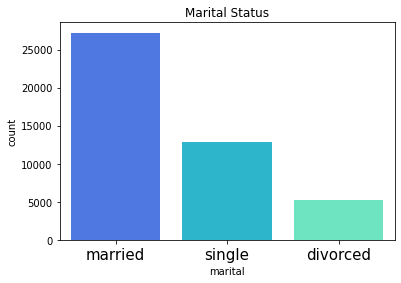

In [47]:
sns.countplot(x='marital', data=data, palette = pal, 
              order=data['marital'].value_counts().index)
plt.xticks(fontsize = 15)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

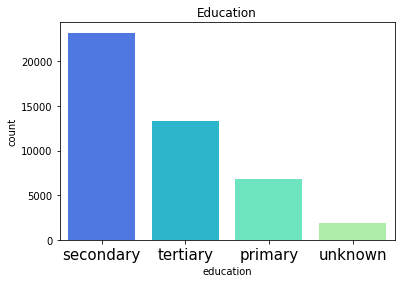

In [48]:
sns.countplot(x='education', data=data, palette = pal, 
              order=data['education'].value_counts().index)
plt.xticks(fontsize = 15)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

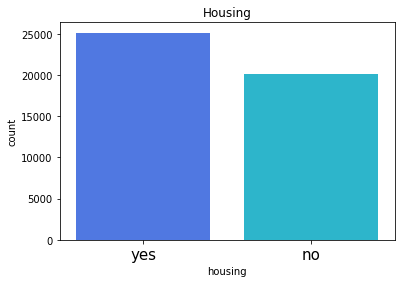

In [49]:
sns.countplot(x='housing', data=data, palette = pal, 
              order=data['housing'].value_counts().index)
plt.xticks(fontsize = 15)
plt.title('Housing')

Text(0.5, 1.0, 'Loan')

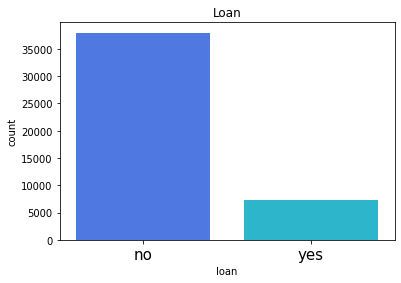

In [50]:
sns.countplot(x='loan', data=data, palette = pal, 
              order=data['loan'].value_counts().index)
plt.xticks(fontsize = 15)
plt.title('Loan')

In [51]:
countNotermdeposit = len(data[data.y == 'no'])
counthavetermdeposit = len(data[data.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(data.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(data.y))*100)))

Percentage of Customer doesn't have a term deposit: 88.30%
Percentage of Customer have a term deposit: 11.70%


In [52]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Whether the client has subscribed a term deposit or not ')

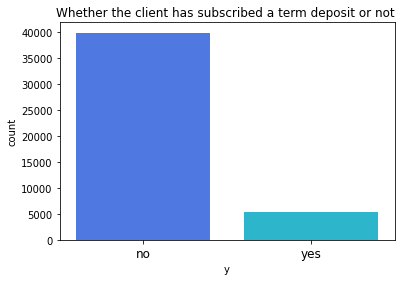

In [53]:
sns.countplot(x='y', data=data, palette = pal, 
              order=data['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has subscribed a term deposit or not ')

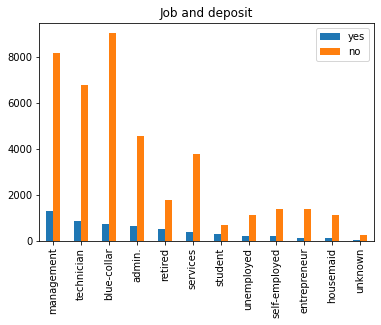

In [54]:
s_df = pd.DataFrame()

s_df['yes'] = data[data['y'] == 'yes']['job'].value_counts()
s_df['no'] = data[data['y'] == 'no']['job'].value_counts()

s_df.plot.bar(title = 'Job and deposit')

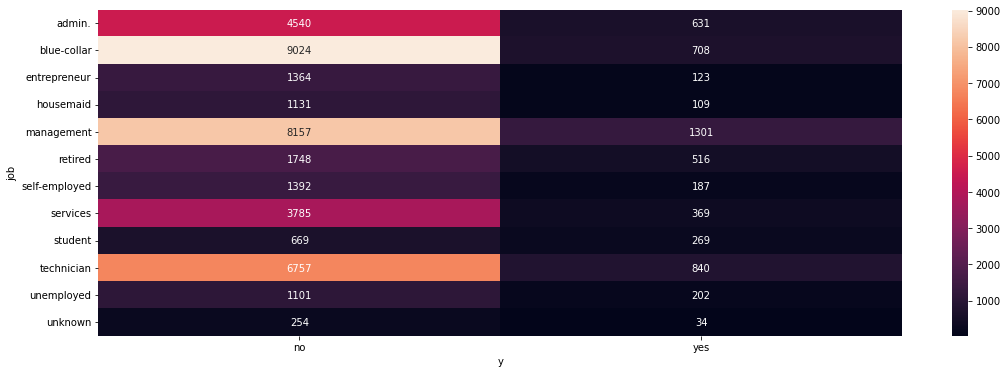

In [55]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=data['job'], columns=data['y']), annot=True, 
            fmt='g')


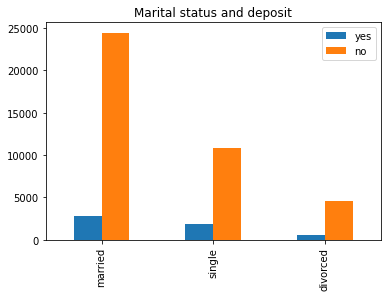

In [56]:
s_df = pd.DataFrame()

s_df['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
s_df['no'] = data[data['y'] == 'no']['marital'].value_counts()

s_df.plot.bar(title = 'Marital status and deposit')

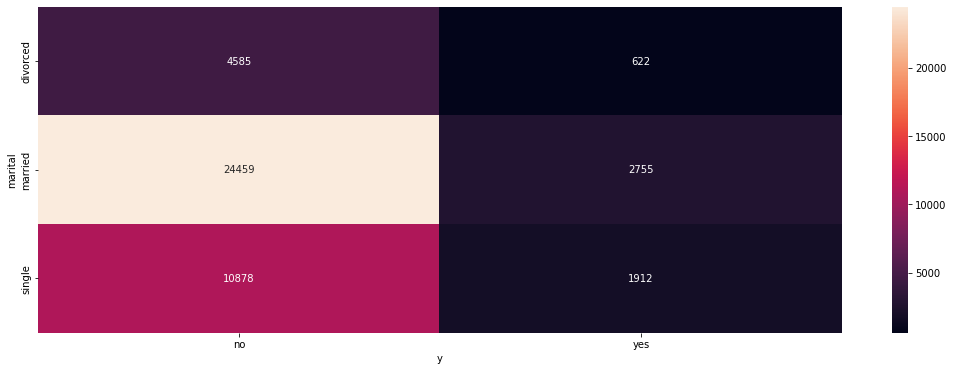

In [57]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=data['marital'], columns=data['y']), annot=True, 
            fmt='g')

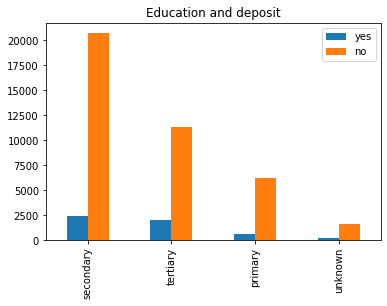

In [58]:
s_df = pd.DataFrame()

s_df['yes'] = data[data['y'] == 'yes']['education'].value_counts()
s_df['no'] = data[data['y'] == 'no']['education'].value_counts()

s_df.plot.bar(title = 'Education and deposit')

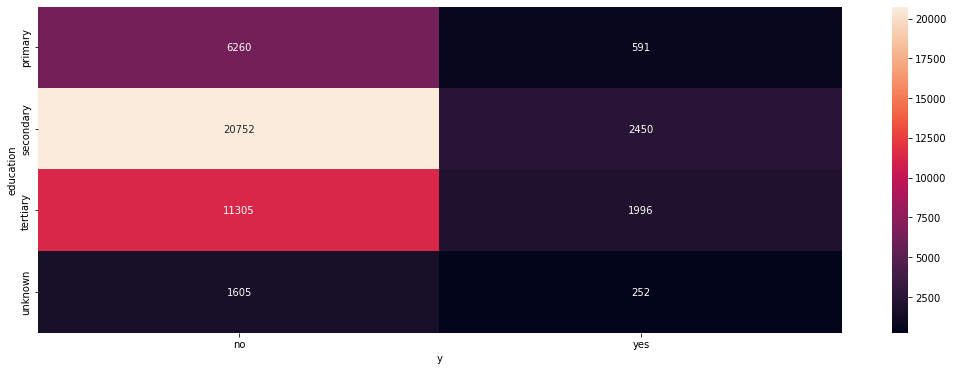

In [59]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=data['education'], columns=data['y']), annot=True, 
            fmt='g')

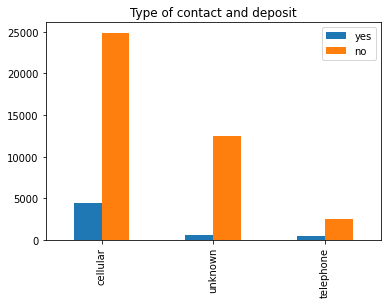

In [60]:
s_df = pd.DataFrame()

s_df['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
s_df['no'] = data[data['y'] == 'no']['contact'].value_counts()

s_df.plot.bar(title = 'Type of contact and deposit')

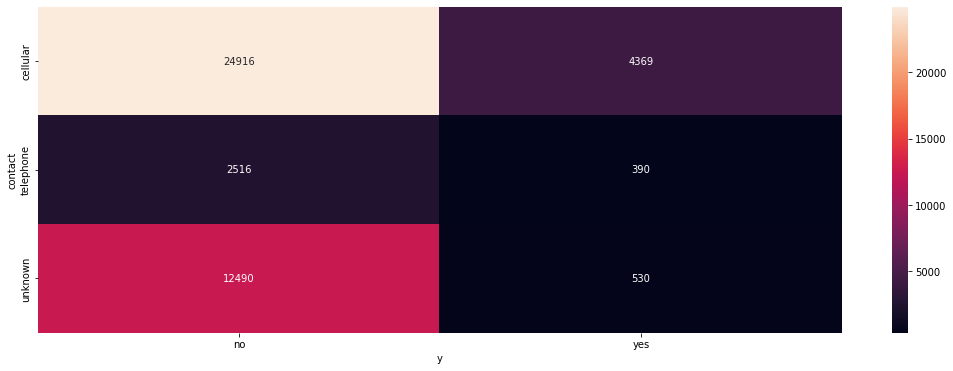

In [61]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=data['contact'], columns=data['y']), annot=True, 
            fmt='g')

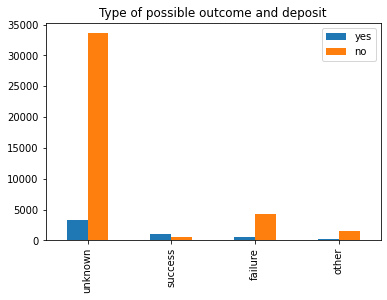

In [62]:
s_df = pd.DataFrame()

s_df['yes'] = data[data['y'] == 'yes']['poutcome'].value_counts()
s_df['no'] = data[data['y'] == 'no']['poutcome'].value_counts()

s_df.plot.bar(title = 'Type of possible outcome and deposit')

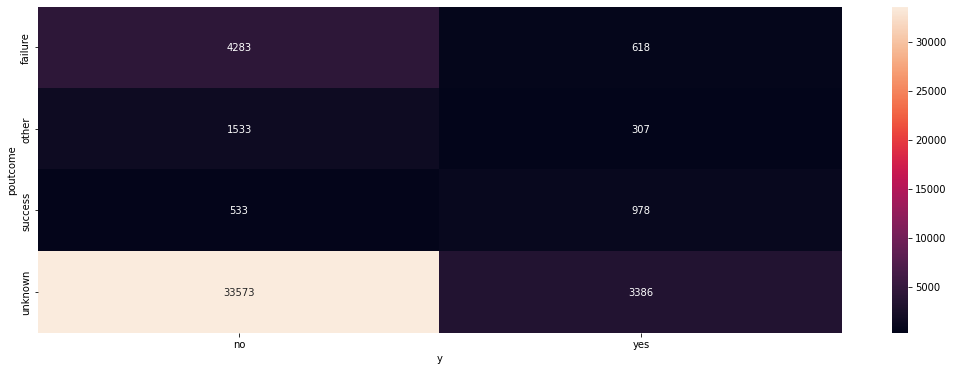

In [63]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=data['poutcome'], columns=data['y']), annot=True, 
            fmt='g')

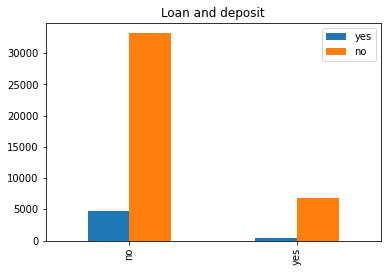

In [64]:
s_df = pd.DataFrame()

s_df['yes'] = data[data['y'] == 'yes']['loan'].value_counts()
s_df['no'] = data[data['y'] == 'no']['loan'].value_counts()

s_df.plot.bar(title = 'Loan and deposit')

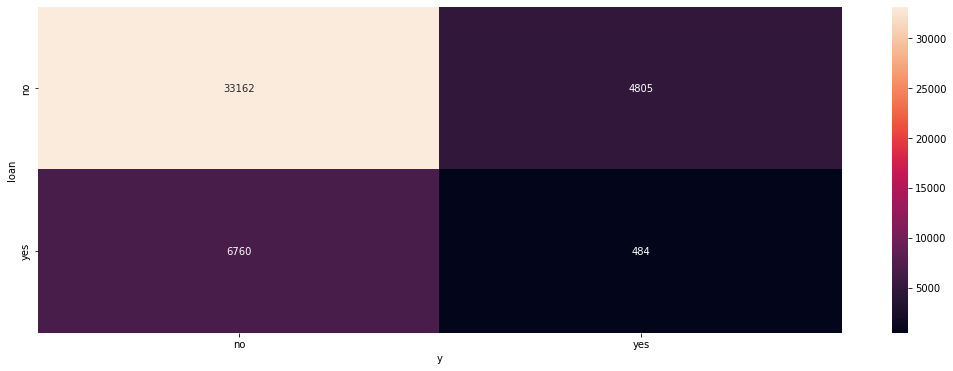

In [65]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=data['loan'], columns=data['y']), annot=True, 
            fmt='g')

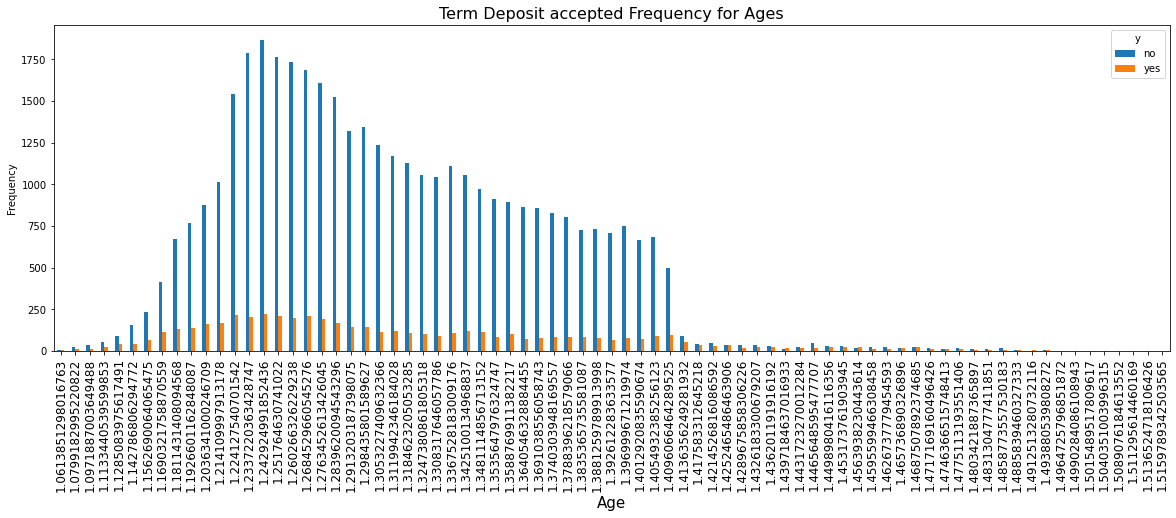

In [66]:
pd.crosstab(data.age,data.y).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

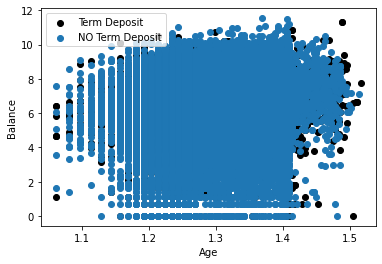

In [67]:
plt.scatter(x=data.age[data.y== 'yes'], y=data.balance[(data.y== 'yes')], c="black")
plt.scatter(x=data.age[data.y== 'no'], y=data.balance[(data.y== 'no')])
plt.legend(["Term Deposit", "NO Term Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

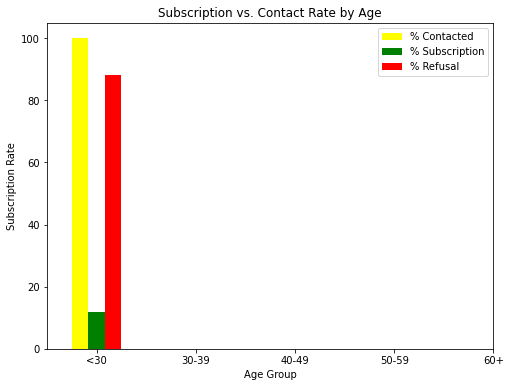

In [68]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [50]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Contacted','% Subscription','% Refusal']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('yellow','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()


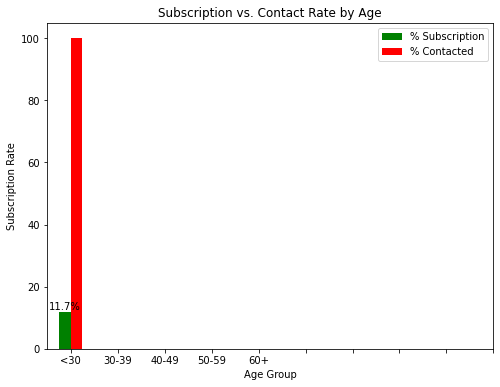

In [69]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(10), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')


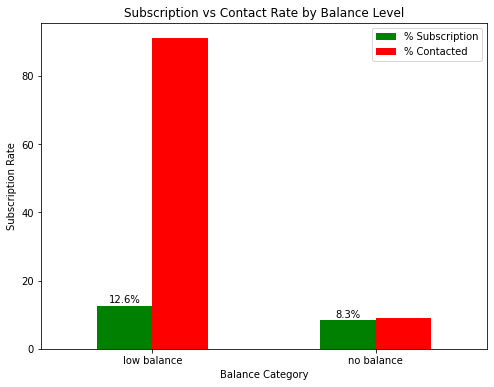

In [70]:
lst = [data]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(data['y'],data['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(data['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')


In [71]:
df  =data.copy()
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

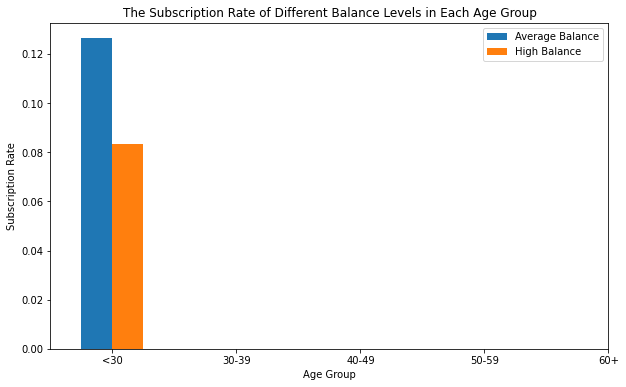

In [72]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()


In [73]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [74]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

response,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


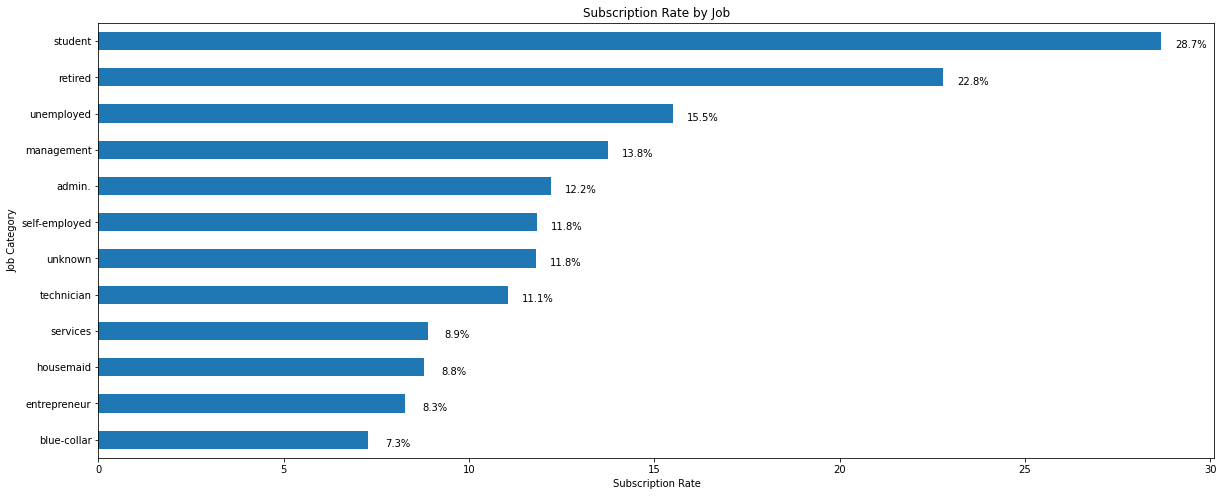

In [75]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (20,8))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [76]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [77]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct

response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


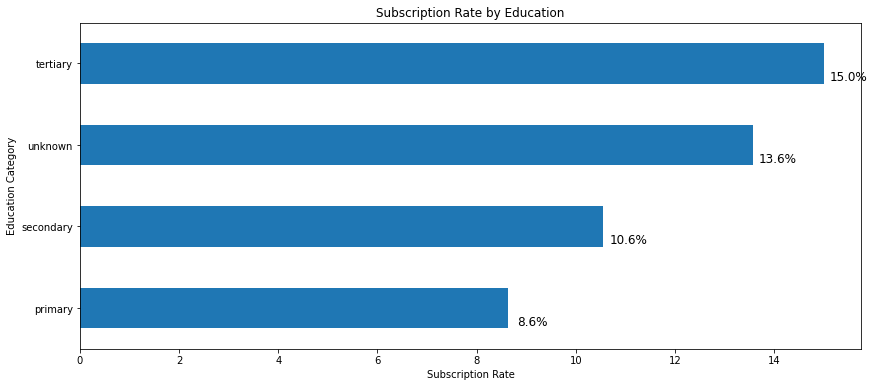

In [78]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom',
                fontsize = 'large')

In [79]:
cols = [col for col in data.columns]
col_missing = []
for col in cols:
    if 'unknown' in data[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing) 

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


In [80]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",data[data[col].str.contains('unknown')][col].count())

Unknown values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [81]:
print(data.groupby(data['job'])['job'].count(),"\n")

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [82]:
print(data.groupby(data['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [83]:
print(data.groupby(data['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [84]:
print(data.groupby(data['contact'])['contact'].count(),"\n")

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



In [85]:
df = data.copy()

In [86]:
df[['job','education','contact','poutcome']] = df[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [87]:
df.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [88]:
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,1.401292,management,married,tertiary,0,7.669962,1,0,other,0.475885,may,5.564520,-inf,NaN,-inf,other,0,20.0,low balance
1,1.330832,technician,single,secondary,0,3.367296,1,0,other,0.475885,may,5.017280,-inf,NaN,-inf,other,0,20.0,low balance
2,1.251765,entrepreneur,married,secondary,0,0.693147,1,1,other,0.475885,may,4.330733,-inf,NaN,-inf,other,0,20.0,low balance
3,1.348111,blue-collar,married,other,0,7.317212,1,0,other,0.475885,may,4.521789,-inf,NaN,-inf,other,0,20.0,low balance
4,1.251765,other,single,other,0,0.000000,0,0,other,0.475885,may,5.288267,-inf,NaN,-inf,other,0,20.0,no balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.369104,technician,married,tertiary,0,6.715383,0,0,cellular,1.041412,nov,6.884487,0.094048,NaN,-inf,other,1,20.0,low balance
45207,1.449898,retired,divorced,primary,0,7.455298,0,0,cellular,1.041412,nov,6.122493,-0.366513,NaN,-inf,other,1,20.0,low balance
45208,1.453174,retired,married,secondary,0,8.650850,0,0,cellular,1.041412,nov,7.027315,0.475885,1.651527,1.098612,success,1,20.0,low balance
45209,1.397000,blue-collar,married,secondary,0,6.504288,0,0,telephone,1.041412,nov,6.230481,0.326634,NaN,-inf,other,0,20.0,low balance


In [89]:
categorical = df.select_dtypes(include=['object'])
categorical.head(10)

,job,marital,education,contact,month,poutcome,balance_group
0,management,married,tertiary,other,may,other,low balance
1,technician,single,secondary,other,may,other,low balance
2,entrepreneur,married,secondary,other,may,other,low balance
3,blue-collar,married,other,other,may,other,low balance
4,other,single,other,other,may,other,no balance
5,management,married,tertiary,other,may,other,low balance
6,management,single,tertiary,other,may,other,low balance
7,entrepreneur,divorced,tertiary,other,may,other,low balance
8,retired,married,primary,other,may,other,low balance
9,technician,single,secondary,other,may,other,low balance


In [90]:
categorical.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [91]:
dummies = pd.get_dummies(categorical)
dummies.head(10)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_low balance,balance_group_no balance
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
6,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
7,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
8,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [92]:
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [93]:
pd.set_option("display.max.columns", None)
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_low balance,balance_group_no balance
0,1.401292,0,7.669962,1,0,0.475885,5.564520,-inf,NaN,-inf,0,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,1.330832,0,3.367296,1,0,0.475885,5.017280,-inf,NaN,-inf,0,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1.251765,0,0.693147,1,1,0.475885,4.330733,-inf,NaN,-inf,0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,1.348111,0,7.317212,1,0,0.475885,4.521789,-inf,NaN,-inf,0,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1.251765,0,0.000000,0,0,0.475885,5.288267,-inf,NaN,-inf,0,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.369104,0,6.715383,0,0,1.041412,6.884487,0.094048,NaN,-inf,1,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
45207,1.449898,0,7.455298,0,0,1.041412,6.122493,-0.366513,NaN,-inf,1,20.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
45208,1.453174,0,8.650850,0,0,1.041412,7.027315,0.475885,1.651527,1.098612,1,20.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
45209,1.397000,0,6.504288,0,0,1.041412,6.230481,0.326634,NaN,-inf,0,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [94]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'age_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_other', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_other',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'balance_group_low balance',
       'balance_group_no balance'],
      dtype='object')

In [99]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

In [100]:
order

{'month': {'jan': 1,
  'feb': 2,
  'mar': 3,
  'apr': 4,
  'may': 5,
  'jun': 6,
  'jul': 7,
  'aug': 8,
  'sep': 9,
  'oct': 10,
  'nov': 11,
  'dec': 12}}

In [103]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_low balance,balance_group_no balance
0,1.401292,0,7.669962,1,0,0.475885,5.564520,-inf,NaN,-inf,0,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,1.330832,0,3.367296,1,0,0.475885,5.017280,-inf,NaN,-inf,0,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1.251765,0,0.693147,1,1,0.475885,4.330733,-inf,NaN,-inf,0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,1.348111,0,7.317212,1,0,0.475885,4.521789,-inf,NaN,-inf,0,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1.251765,0,0.000000,0,0,0.475885,5.288267,-inf,NaN,-inf,0,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.369104,0,6.715383,0,0,1.041412,6.884487,0.094048,NaN,-inf,1,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
45207,1.449898,0,7.455298,0,0,1.041412,6.122493,-0.366513,NaN,-inf,1,20.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
45208,1.453174,0,8.650850,0,0,1.041412,7.027315,0.475885,1.651527,1.098612,1,20.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
45209,1.397000,0,6.504288,0,0,1.041412,6.230481,0.326634,NaN,-inf,0,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [109]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [111]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 50)
Shape of X_test:  (9043, 50)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [112]:
from sklearn.feature_selection import RFE

In [119]:
classifier = LogisticRegression()
rfe = RFE(classifier,n_features_to_select=15)




In [121]:
import statsmodels.api as sm

In [128]:
col1=x_train.columns
x_train_sm = sm.add_constant(x_train[col1])



In [129]:
col1

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'age_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_other', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_other',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'balance_group_low balance',
       'balance_group_no balance'],
      dtype='object')

In [132]:
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred=(x_test_sm)
y_test_pred[:10]

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_low balance,balance_group_no balance
14001,1.283962,0,7.246368,1,0,0.834032,4.510860,0.996229,NaN,-inf,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
32046,1.276345,0,NaN,1,0,0.970422,6.978214,-inf,NaN,-inf,20.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13318,1.348111,0,NaN,0,1,0.732099,5.493061,0.475885,NaN,-inf,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
42991,1.397000,0,6.216606,1,1,0.874591,4.653960,0.665730,1.655642,0.693147,20.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14237,1.251765,1,NaN,1,1,0.970422,5.805135,-0.366513,NaN,-inf,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
14360,1.318462,0,NaN,1,0,0.970422,4.859812,-0.366513,NaN,-inf,20.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
36635,1.224128,0,7.497207,1,0,0.910235,5.308268,-0.366513,NaN,-inf,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
37042,1.203634,0,6.066108,1,0,0.941939,4.219508,-0.366513,1.774003,0.693147,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
25994,1.353565,0,6.778785,0,0,1.079918,4.912655,0.094048,NaN,-inf,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
14555,1.405493,0,NaN,0,1,0.996229,3.713572,0.475885,NaN,-inf,20.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [133]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([1.28396201, 0.        , 7.24636808, 1.        , 0.        ,
       0.83403245, 4.51085951, 0.99622889,        nan,       -inf])

In [141]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
  
   


In [154]:
accuracies = {}

lr = LogisticRegression()
acc=lr.score
accuracies['Logistic Regression'] = acc
print("Test Accuracy".format(acc))

Test Accuracy


In [176]:


y_test.value_counts()

0    7980
1    1063
Name: y, dtype: int64

In [177]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

Mean of 1's 0.1175494857901139 
 Percentage of 1's 12.0 %


In [178]:

print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 0's 0.8824505142098861 
 Percentage of 0's 88.0 %


In [179]:
y_test.value_counts().head(1) / len(y_test)

0    0.882451
Name: y, dtype: float64

In [213]:
confusion=(y_test,y_predict)
TP = confusion[1:1]
TN = confusion[0: 0]
FP = confusion[0: 1]
FN = confusion[1: 0]

In [216]:
confusion

(14001    0
 32046    1
 13318    0
 42991    0
 14237    0
         ..
 18448    1
 6654     0
 17106    0
 9025     1
 13171    0
 Name: y, Length: 9043, dtype: int64,
             age  default   balance  housing  loan       day  duration  \
 14001  1.283962        0  7.246368        1     0  0.834032  4.510860   
 32046  1.276345        0       NaN        1     0  0.970422  6.978214   
 13318  1.348111        0       NaN        0     1  0.732099  5.493061   
 42991  1.397000        0  6.216606        1     1  0.874591  4.653960   
 14237  1.251765        1       NaN        1     1  0.970422  5.805135   
 ...         ...      ...       ...      ...   ...       ...       ...   
 18448  1.378840        0  5.529429        0     0  1.233722  6.588926   
 6654   1.203634        0  7.598900        1     1  1.203634  4.007333   
 17106  1.203634        0  1.945910        0     0  1.169032  3.912023   
 9025   1.405493        0      -inf        0     0  0.475885  6.699500   
 13171  1.364055

In [235]:
y_pred_prob=x_test
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Subscription (0)', 'Prob of - Subscription (1)'])

y_pred_prob_df

,Prob of - No Subscription (0),Prob of - Subscription (1)
14001,NaN,NaN
32046,NaN,NaN
13318,NaN,NaN
42991,NaN,NaN
14237,NaN,NaN
...,...,...
18448,NaN,NaN
6654,NaN,NaN
17106,NaN,NaN
9025,NaN,NaN


In [264]:


predict = pd.DataFrame({'Actual':y,'Predicted':y_test})
predict

,Actual,Predicted
0,0,NaN
1,0,NaN
2,0,NaN
3,0,0.0
4,0,NaN
...,...,...
45206,1,NaN
45207,1,1.0
45208,1,NaN
45209,0,NaN


In [268]:
from sklearn.neighbors import DistanceMetric
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(x_train))

Original dataset shape Counter({0: 31942, 1: 4226})
Resampled dataset shape Counter({'age': 1, 'default': 1, 'balance': 1, 'housing': 1, 'loan': 1, 'day': 1, 'duration': 1, 'campaign': 1, 'pdays': 1, 'previous': 1, 'age_group': 1, 'job_admin.': 1, 'job_blue-collar': 1, 'job_entrepreneur': 1, 'job_housemaid': 1, 'job_management': 1, 'job_other': 1, 'job_retired': 1, 'job_self-employed': 1, 'job_services': 1, 'job_student': 1, 'job_technician': 1, 'job_unemployed': 1, 'marital_divorced': 1, 'marital_married': 1, 'marital_single': 1, 'education_other': 1, 'education_primary': 1, 'education_secondary': 1, 'education_tertiary': 1, 'contact_cellular': 1, 'contact_other': 1, 'contact_telephone': 1, 'month_apr': 1, 'month_aug': 1, 'month_dec': 1, 'month_feb': 1, 'month_jan': 1, 'month_jul': 1, 'month_jun': 1, 'month_mar': 1, 'month_may': 1, 'month_nov': 1, 'month_oct': 1, 'month_sep': 1, 'poutcome_failure': 1, 'poutcome_other': 1, 'poutcome_success': 1, 'balance_group_low balance': 1, 'balance

In [277]:
accuracies = {}

acc = y_train.score

accuracies['Logistic Regression'] = acc
print("Test Accuracy".format(acc))

Test Accuracy


In [309]:
!pip install plot.metric
!pip install plot.metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [316]:
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test,(x_test),  labels=[0, 1])
plt.figure(figsize=(16, 8))
plt.show()

<Figure size 1152x576 with 0 Axes>

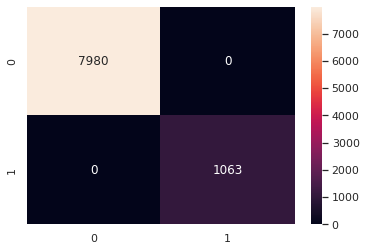

In [328]:
y_pred_proba = y_test
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_pred_labels = (y_pred_proba >= 0.4)
# plot the confusion matrix

sns.heatmap(cm(y_test, y_pred_labels), annot=True, fmt='0.0f')

In [329]:
print(report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7980
           1       1.00      1.00      1.00      1063

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

